### Step 3: Data exploration

__Step goals:__  visualize the data to find certain patterns or regularities, generate figures for future publishing. 

__Step overview:__
1. Aggregated pattern for all stations over time;
2. Entry vs exits;
3. Entry vs adult population in Voronoi cell;
4. Adult population in Voronoi cells.

### Step 3 Data exploration

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

plt.style.use('science')

In [3]:
# Increase font size
font = {'size' : 12}
matplotlib.rc('font', **font)

In [4]:
# Load the data
entry_voronoi = gpd.read_file("../data/processed/counts/entry_voronoi.json")
exit_voronoi = gpd.read_file("../data/processed/counts/exit_voronoi.json")
entry_station = gpd.read_file("../data/processed/counts/entry_station.json")
exit_station = gpd.read_file("../data/processed/counts/exit_station.json")

1. Total traffic over all stations

In [18]:
# Select the variables for plotting
# x = entry_station.loc[:, "0200-0215":"0145-0200"].sum(axis=0)
x = entry_station.loc[:, "0200-0215":"0145-0200"].mean()
y = exit_station.loc[:, "0200-0215":"0145-0200"].sum(axis=0)

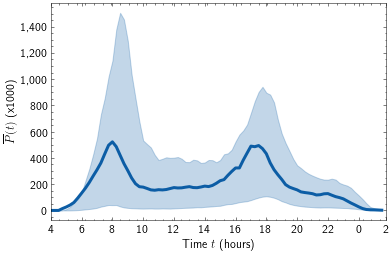

In [19]:
# quantile aggregated pattern
fig, ax = plt.subplots(figsize=(6,4))
# x.div(1000).plot(ax=ax, linewidth=3)
x.plot(ax=ax, linewidth=3)
q1 = exit_station.loc[:, "0200-0215":"0145-0200"].quantile(0.1) # .plot(ax=ax, color='#0C5DA5')
q3 = exit_station.loc[:, "0200-0215":"0145-0200"].quantile(0.9)
ax.fill_between(x.index, q1, q3, color='#0C5DA5', alpha=0.25)
# y.plot(ax=ax, linewidth=3, label="Exit")

x_ticks = [0, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 96]
x_ticks_labels = ["2", "4", "6", "8", "10", "12", "14", "16", "18", "20", "22", "0", "2"]

# x_ticks_labels = ["02:00", "04:00", "06:00", "08:00", "10:00", "12:00", "14:00", "16:00", "18:00", "20:00", "22:00", "00:00", "02:00"]

ax.set_xlabel("Time $t$ (hours)") #, fontsize=12)
ax.set_ylabel(r'$\overline P(t)$ (x1000)') # , fontsize=12)
# ax.set_ylabel(r'$\sum_i P_i(t)$ (x1000)') # , fontsize=12)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_labels)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')));
ax.set_xlim(left=9, right=96)
# ax.set_title("Aggregated passenger counts for the whole day across all metro stations of London")
# plt.legend()
# plt.legend(frameon=False);
# plt.savefig('../figures/fig1a.eps')
plt.savefig('../figures/fig1a.png', dpi=300)

2. Entry vs exits

In [22]:
x = exit_station.loc[:, "0200-0215":"0145-0200"].sum(axis=1)
y = entry_station.loc[:, "0200-0215":"0145-0200"].sum(axis=1)

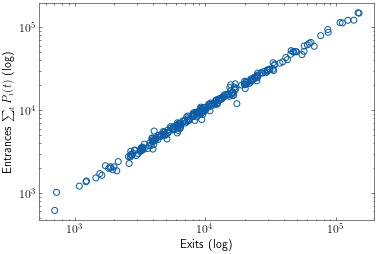

In [23]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.scatter(x=x, y=y, facecolors='none', edgecolors='#0C5DA5')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Exits (log)");  # , fontsize=12)
ax.set_ylabel(r'Entrances $\sum_t P_i(t)$ (log)')  # , fontsize=12)
# fig.savefig("../figures/fig1b.eps");
plt.savefig("../figures/fig1b.png", dpi=300);

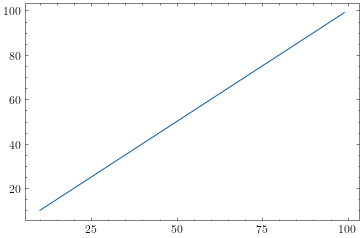

In [28]:
fig, ax = plt.subplots()

x = [_ for _ in range(10, 100)]
y = [_ for _ in range(10, 100)]

ax.plot(x,y)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

3. Population vs entry

In [5]:
x = entry_voronoi["adult_population"].div(1000)
y = entry_voronoi.loc[:, "0200-0215":"0145-0200"].sum(axis=1)

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [7]:
rho = pd.DataFrame([x, y]).T.corr().iloc[0,1]

In [8]:
rho

0.1452297951247686

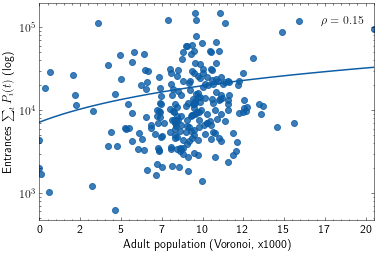

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot(x, y, ci=False, ax=ax, label=fr'$\rho={round(rho, 2)}$', color="#0C5DA5")
ax.set_xlabel("Adult population (Voronoi, x1000)")
ax.set_ylabel(r'Entrances $\sum_t P_i(t)$ (log)')  # , fontsize=12)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
ax.legend(loc='upper right', frameon=False);
ax.set_yscale('log')
plt.savefig("../figures/fig1c.png", dpi=300);

4. London adult population in Voronoi cells

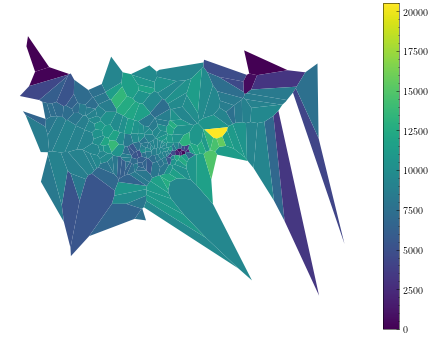

In [5]:
entry_voronoi.plot(column="adult_population", figsize=(8, 6), legend=True)
plt.axis("off");
# plt.savefig("../figures/fig2b.eps");